In [1]:
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
import pickle
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_glass_brain, plot_stat_map
import matplotlib.pyplot as plt
import pandas as pd

/work/neuro_4/neuro_env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
# loading the objects:
f = open('../data/PvsN_searchlight.pkl', 'rb')
searchlight, searchlight.scores_ = pickle.load(f)
f.close()

mask_wb_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)

f = open('../data/PvsN_02_searchlight_prep.pkl', 'rb')
fmri_img_train, fmri_img_test, idx_train,idx_test, conditions_train, conditions_test = pickle.load(f)
f.close()

In [3]:
print('Number of voxels in searchlight: ',searchlight.scores_.size)
#Find the percentile that makes the cutoff for the 500 best voxels
perc=100*(1-500.0/searchlight.scores_.size)
#Print percentile
print('Percentile for 500 most predictive voxels: ',perc)
#Find the cutoff
cut=np.percentile(searchlight.scores_,perc)
#Print cutoff
print('Cutoff for 500 most predictive voxels: ', cut)
#cut=0
#Make a mask using cutoff

#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

# .astype() makes a copy.
process_mask2 = mask_img2.get_fdata().astype(int)
process_mask2[searchlight.scores_<=cut] = 0
process_mask2_img = new_img_like(mask_img2, process_mask2)



Number of voxels in searchlight:  8980290
Percentile for 500 most predictive voxels:  99.9944322510743
Cutoff for 500 most predictive voxels:  0.6142857142857143


/tmp/ipykernel_1501/642982622.py:19: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask2_img = new_img_like(mask_img2, process_mask2)


/work/neuro_4/neuro_env/lib/python3.10/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


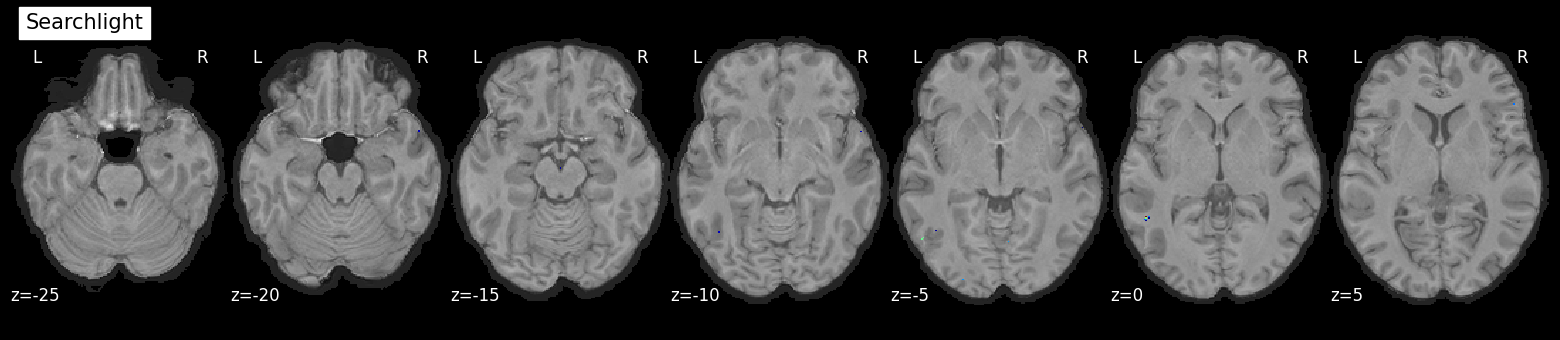

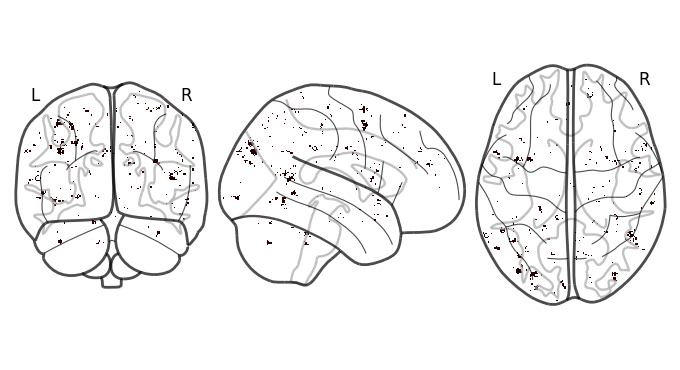

In [4]:
# --------------
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
%matplotlib inline
#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)
#Plot the searchlight scores on an anatomical background
plot_img(searchlight_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Searchlight", display_mode="z",cut_coords=[-25,-20,-15,-10,-5,0,5],
         cmap='jet', threshold=cut, black_bg=True)
#plotting.plot_glass_brain effects
fig=plotting.plot_glass_brain(searchlight_img,threshold=cut)
fig.savefig("../plots/PvsN_glass_500_voxels.png", dpi=300)

In [5]:
from atlasreader import create_output
#create_output(searchlight_img, voxel_thresh=cut, cluster_extent=2,direction='pos')
create_output(searchlight_img, voxel_thresh=cut, cluster_extent=2, direction='pos', outdir='../PvsN_atlasreader')

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



In [6]:
pd.read_csv('../PvsN_atlasreader/atlasreader_peaks.csv')

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-39.0,-81.196,31.424,0.652463,37.226631,Occipital_Mid_L,Unknown,81.0% Left_Lateral_Occipital_Cortex_superior_d...
1,2.0,-26.0,-84.127,37.286,0.642611,18.136051,Occipital_Mid_L,Unknown,71.0% Left_Lateral_Occipital_Cortex_superior_d...
2,3.0,46.0,-53.840,10.907,0.646429,14.317935,Temporal_Mid_R,Right-Cerebral-White-Matter,37.0% Right_Middle_Temporal_Gyrus_temporooccip...
3,4.0,-41.0,2.826,51.941,0.639286,13.363406,Frontal_Mid_2_L,Unknown,43.0% Left_Middle_Frontal_Gyrus; 17.0% Left_Pr...
4,5.0,-25.0,-94.874,-3.748,0.642611,10.499819,Occipital_Inf_L,ctx-lh-lateraloccipital,54.0% Left_Occipital_Pole; 8.0% Left_Lateral_O...
...,...,...,...,...,...,...,...,...,...
57,58.0,-42.0,-57.748,-3.748,0.617980,1.909058,Temporal_Mid_L,ctx-lh-inferiortemporal,31.0% Left_Inferior_Temporal_Gyrus_temporoocci...
58,59.0,-62.0,-55.794,8.953,0.624631,1.909058,Temporal_Mid_L,ctx-lh-middletemporal,38.0% Left_Middle_Temporal_Gyrus_temporooccipi...
59,60.0,-62.0,-60.679,31.424,0.621798,1.909058,no_label,Unknown,5.0% Left_Lateral_Occipital_Cortex_superior_di...
60,61.0,-65.0,-55.794,31.424,0.615025,1.909058,no_label,Unknown,0% no_label


In [7]:

from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=process_mask2_img, standardize=False)

# We use masker to retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_img_test)
#Print size of matrix (images x voxels)
print(fmri_masked.shape)

from sklearn.model_selection import permutation_test_score
score_cv_test, scores_perm, pvalue= permutation_test_score(
    GaussianNB(), fmri_masked, conditions_test, cv=10, n_permutations=1000, 
    n_jobs=-1, random_state=0, verbose=0, scoring=None)
print("Classification Accuracy: %s (pvalue : %s)" % (score_cv_test, pvalue))



/work/neuro_4/neuro_env/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


(72, 498)
Classification Accuracy: 0.5232142857142856 (pvalue : 0.41358641358641357)


In [8]:

# Saving the objects:
f = open('../data/PvsN_05_permutation.pkl', 'wb')
pickle.dump([score_cv_test, scores_perm, pvalue], f)
f.close()

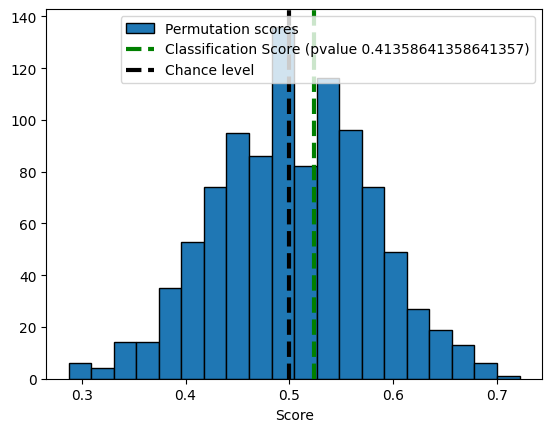

In [9]:


import numpy as np
import matplotlib.pyplot as plt
#How many classes
n_classes = np.unique(conditions_test).size

plt.hist(scores_perm, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score_cv_test], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')

plt.savefig("../plots/PvsN_05_neg_vs_pos_one_sub_perm.png", dpi=300)
plt.show()